# PRACTICAL NO. 4
# DATA WRANGLING II

Operations using Python..(e.g., Academic_Performance.csv)
1. Scan all variables for missing values and inconsistencies. If there are
missing values and/or inconsistencies, use any of the suitable techniques to
deal with them(using median and 0).Apply for single column and whole
dataset.
2. Scan all numeric variables for outliers. If there are outliers,any of the
suitable techniques to deal with them.(using IQR)
3. Display and Remove the outliers show q1 and q3
4. Apply aggregation function (max,avg). The purpose of this
transformation should be one of the following reasons: to change the scale
for better understanding of the variable, to convert a non-linear relation into
a linear one, or to decrease the skewness and convert the distribution into a
normal distribution. Reason and document your approach properly.
5. Draw Scatter plot

# **1**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('datasets/AcademicPerformance_New.csv')

In [3]:
df.head()

,Roll No,NationalITy,WT,DSBDA,AI,Average,Grade,PG
0,1.0,India,72.0,72.0,74.0,72.666667,C,Yes
1,2.0,Japan,69.0,90.0,NaN,53.000000,B,No
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,China,47.0,NaN,44.0,30.333333,D,Yes
4,5.0,India,76.0,78.0,NaN,51.333333,C,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Roll No      98 non-null     float64
 1   NationalITy  98 non-null     object 
 2   WT           91 non-null     float64
 3   DSBDA        95 non-null     float64
 4   AI           89 non-null     float64
 5   Average      98 non-null     float64
 6   Grade        98 non-null     object 
 7   PG           98 non-null     object 
dtypes: float64(5), object(3)
memory usage: 6.3+ KB


In [5]:
df['WT'] = df['WT'].fillna(df['WT'].mean())
df['DSBDA'] = df['DSBDA'].fillna(df['DSBDA'].mean())
df['AI'] = df['AI'].fillna(df['DSBDA'].mean())

In [6]:
df.dropna(subset=['Roll No'],inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98 entries, 0 to 98
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Roll No      98 non-null     float64
 1   NationalITy  98 non-null     object 
 2   WT           98 non-null     float64
 3   DSBDA        98 non-null     float64
 4   AI           98 non-null     float64
 5   Average      98 non-null     float64
 6   Grade        98 non-null     object 
 7   PG           98 non-null     object 
dtypes: float64(5), object(3)
memory usage: 6.9+ KB


In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df['Roll No'].astype(int)

0      1
1      2
3      4
4      5
5      6
      ..
94    95
95    96
96    97
97    98
98    99
Name: Roll No, Length: 98, dtype: int64

# **2 and 3** 

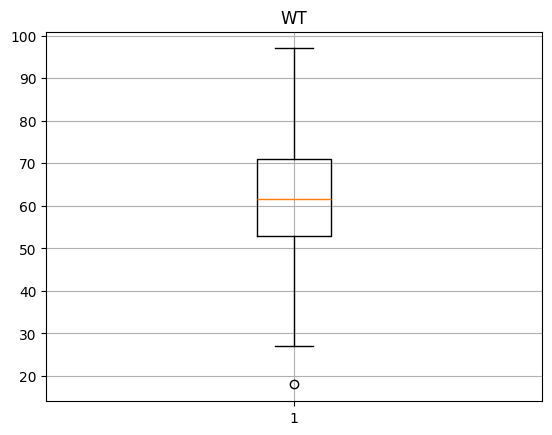

In [10]:
plt.boxplot(df['WT'])
plt.title('WT')
plt.grid(True)
plt.show()

In [11]:
Q1 = df['WT'].quantile(0.25)
Q3 = df['WT'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
lower, upper

(np.float64(26.0), np.float64(98.0))

In [12]:
df = df[~((df['WT']<lower) | (df['WT']>upper))]

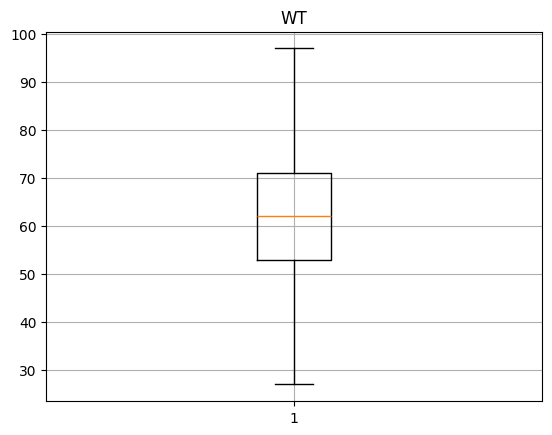

In [13]:
plt.boxplot(df['WT'])
plt.title('WT')
plt.grid(True)
plt.show()

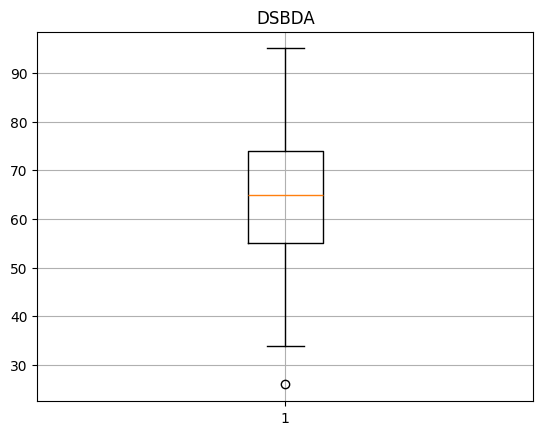

In [14]:
plt.boxplot(df['DSBDA'])
plt.title('DSBDA')
plt.grid(True)
plt.show()

In [15]:
Q1 = df['DSBDA'].quantile(0.25)
Q3 = df['DSBDA'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
lower, upper

(np.float64(26.5), np.float64(102.5))

In [16]:
df = df[~((df['DSBDA']<lower) | (df['DSBDA']>upper))]

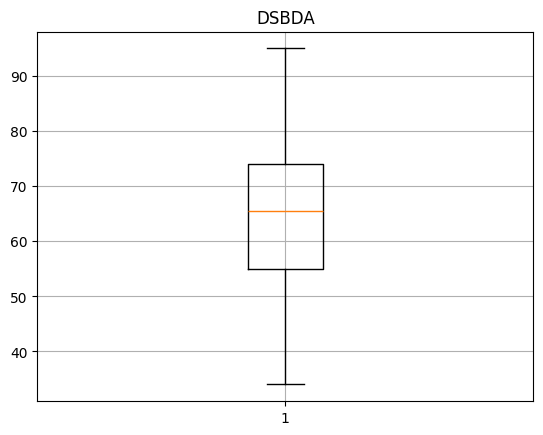

In [17]:
plt.boxplot(df['DSBDA'])
plt.title('DSBDA')
plt.grid(True)
plt.show()

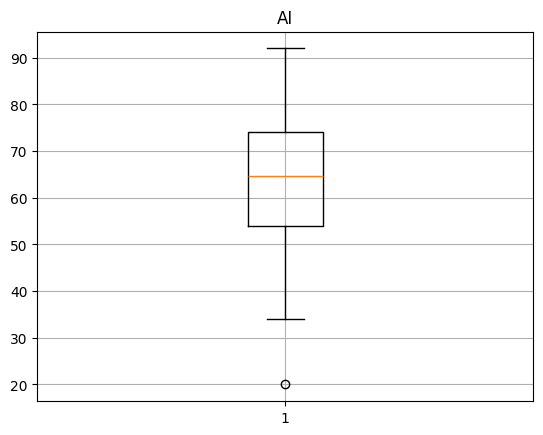

In [18]:
plt.boxplot(df['AI'])
plt.title('AI')
plt.grid(True)
plt.show()

In [19]:
Q1 = df['AI'].quantile(0.25)
Q3 = df['AI'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
lower, upper

(np.float64(24.0), np.float64(104.0))

In [20]:
df = df[~((df['AI']<lower) | (df['AI']>upper))]

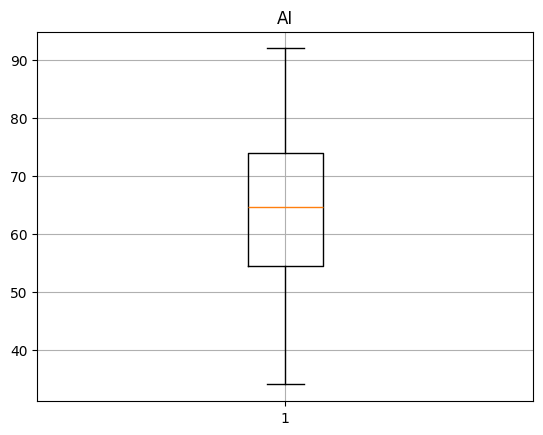

In [21]:
plt.boxplot(df['AI'])
plt.title('AI')
plt.grid(True)
plt.show()

# **4 and 5**

# Lets do this for AI and DBMS

In [22]:
df['AI'].skew(), df['DSBDA'].skew()

(np.float64(-0.29290450930791145), np.float64(-0.2369463400818316))

In [23]:
df['AI'].max(), df['AI'].mean()

(np.float64(92.0), np.float64(63.693407202216065))

In [24]:
df['DSBDA'].max(), df['DSBDA'].mean()

(np.float64(95.0), np.float64(65.55745152354571))

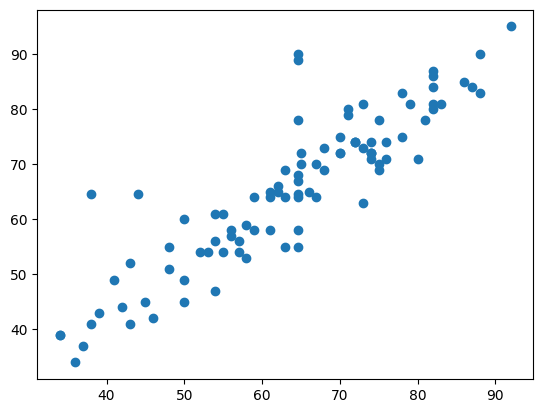

In [25]:
plt.scatter(x=df['AI'], y=df['DSBDA'])

In [26]:
df[['AI','DSBDA']].corr()

,AI,DSBDA
AI,1.000000,0.890192
DSBDA,0.890192,1.000000
